## Overview

Here you'll find some parts that were too repetitive too keep in the main notebooks.

In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas 
import matplotlib.pyplot as plt #import matplotlib 

In [2]:
#reading in the csv file
df_main=pd.read_csv("data/Yelp_dataset_old/yelp_business.csv")

In [3]:
#Dropping the neighborhood column
df_main=df_main.drop(['neighborhood'],axis=1)

## Loading Buisness Attributes Data

In this section we'll load in the business attributes dataframe. We'll be taking a look at any columns that we can add onto our main dataframe as a way of increasing the number of features. 

In [4]:
#reading in the csv file
df_business_attributes=pd.read_csv("data/Yelp_dataset_old/yelp_business_attributes.csv")

In [5]:
df_business_attributes.head() #Taking a look at the first 5 rows 

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


We see that the column that we'll be joining on is business_id. We also see that there are a number of columns that could be useful like DietaryRestrictions_dairy-free. However we're already seeing a lot of Na values which might make extracting data from these columns difficult.

In [6]:
#looking at some of the columns
df_business_attributes.columns 

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

Looking at the above, we already see columns that have nothing to do with food, like Hair related ones. We should remove those before proceeding.

In [7]:
#Looking at the number of unique columns 
df_business_attributes.columns.nunique()

82

We currently have 82 columns that will require processing.

In [8]:
#Creating a cleaned attributes dataframe 
df_cleaned_attributes=pd.DataFrame()

Lets drop all the restaurant unrelated categories from the `df_business_attributes`. We will not drop more than 6 at a time in order to make sure they drop correctly.

In [9]:
#dropping 6 unrelated columns 
df_business_attributes=df_business_attributes.drop(columns = ['AcceptsInsurance','HairSpecializesIn_coloring','HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms','HairSpecializesIn_kids'])

In [10]:
#checking the number of columns after 
df_business_attributes.columns.nunique()

76

We can see that 6 Columns were correctly dropped. The columns we dropped in this section involved insurance and hair which I felt wasn't related to food whatsoever. 

In [11]:
#dropping 6 unrelated columns 
df_business_attributes=df_business_attributes.drop(columns = ['HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms','Music_dj', 'Music_background_music', 'Music_no_music'])

In [12]:
#checking the number of columns after 
df_business_attributes.columns.nunique()

70

We can see that 6 Columns were correctly dropped. We dropped the last few hair related ones and also a few about music. While an argument could be made that music is part of the ambiance of a restaurant, we already have a much more descriptive column about ambiance.

In [13]:
#dropping 6 unrelated columns 
df_business_attributes=df_business_attributes.drop(columns = ['HasTV','Music_karaoke','Music_video','Music_jukebox',
                                                              'Music_live','GoodForDancing'])

In [14]:
#checking the number of columns after 
df_business_attributes.columns.nunique()

64

We can see that 6 Columns were correctly dropped. Similar to the last one, while having a TV or the type of Music may contribute to ambiance, we already have a more all-encompassing column regarding ambiance. Also the column about dancing was removed as this is about restaurants not necessarily night-life.

In [15]:
#dropping 4 unrelated columns 
df_business_attributes=df_business_attributes.drop(columns=['DogsAllowed','Smoking','NoiseLevel'])

In [16]:
#checking the number of columns after 
df_business_attributes.columns.nunique()

61

We can see that 3 columns were dropped. The last 4 that we're seeing are more general columns that I feel aren't related to a restaurant.

### Joining the two tables

Now that we've narrowed the columns we have left, lets merge the business attributes and main dataframe together. This will allow us to filter only by the businesses in the 3 target areas before we continue to explore them. This is to get a more accurate representation of how these columns will perform in our selected areas instead of the whole dataset.

In [17]:
#Creating the merged dataframe 
df_merged=pd.merge(df_main, df_business_attributes, on='business_id', how="inner")

In [18]:
#Checking the number of unique columns
df_merged.columns.nunique()

72

Now that we've created our merged dataframe, lets filter only by our 3 regions.

#### Selecting only Ontario/Quebec and restaurants 

In [19]:
#filtering by states of ON,QB, and NV 
df_selected=df_merged[df_merged['state'].str.contains('ON|QC|NV')]

In [20]:
#Unique states
df_selected['state'].unique()

array(['NV', 'ON', 'QC'], dtype=object)

Now we can see the dataset only has businesses in our 3 regions. 

#### Selecting Restaurants

Now we should proceed by filtering based on the key words we found earlier.

In [21]:
#Selecting rows based on if they have the key word tags 
df_selected_restaurants=df_selected[df_selected['categories'].str.contains('Restaurants|Bars|Food|Coffee & Tea')]

### Selecting attributes 

In this section, we'll explore the other categorical columns and decide if we think it will be valuable for our EDA. We will either add it to our cleaned Dataframe or drop the column

In [22]:
df_processed_attributes=pd.DataFrame()

### Defining some basic EDA method 

We'll define two basic functions for us to use. One will be to print the normalized value counts for the column as well as show a basic horizontal bar graph and the other will be to check the number of columns present and print out the column names.

In [23]:
def category_EDA(column_name,dataframe):
    """
    
    This is a simple function that will print out the normalized value counts for the inputted column
    in the inputted dataframe. It will also display a horizontal bar plot with the title being the column name
    The column must be in the inputted dataframe for this to work.
    
    column_name: must be a valid type for column names:i.e. string or integer. 
    dataframe: must be a pandas dataframe
    
    """
    # value count
    print(dataframe[column_name].value_counts(normalize=True))
    
    # plot
    dataframe[column_name].value_counts(normalize=True).plot(kind="barh", title=column_name)
    plt.show()

In [24]:
def drop_check(dataframe):
    """
    
    This function will take in a dataframe and print out the number of unique columns as well as 
    the names of the remaining columns. 
    dataframe: This must be a pandas dataframe 
    
    """
    #print out the number of unique columns left
    print(f'We have',dataframe.columns.nunique(),"Columns left")
    #print out the names of the columns left
    print(f"The columns we have left are: \n",(dataframe.columns))

#### `Buisness ID` column

In [25]:
#Here we'll start the df_state_business dataframe that we'll be using after we process all the attributes. 

df_state_business=df_selected_restaurants[['business_id','name', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories']]

The above is mostly done as a bookkeeping exercise. We'll drop these columns from our df_selected_restaurants dataframe so all that left is the business attributes. The business attributes that we will be using we'll add to a dataframe called `df_proceessed_attributes` just so we know how many columns out of the 61 remaining we end up reducing too. 

In [26]:
#Dropping the columns we just added to df_state_business
df_selected_restaurants.drop(columns=['name', 'address', 'city','state', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'categories'],inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3076628485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['name', 'address', 'city','state', 'postal_code', 'latitude',


In [27]:
#looking at the unique columns 
df_state_business.columns.unique()

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories'],
      dtype='object')

Above is just a quick check to make sure we have the correct columns in the `df_state_business`. Next, we'll add `business_id` to processed attributes just so we are able to join it onto other dataframes. Then we will drop `business_id` from `df_selected_restaurants` and process the rest of the columns.

In [28]:
#Adding business_id to df_processed_attributes
df_processed_attributes['business_id'] = df_selected_restaurants['business_id']

In [29]:
#Dropping business_id 
df_selected_restaurants.drop(columns="business_id", inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/520346945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns="business_id", inplace=True)


### Processing df_selected_restaurants

To start lets take a look at how many columns we're starting with using drop_check method

In [30]:
#drop_check method
drop_check(df_selected_restaurants)

We have 60 Columns left
The columns we have left are: 
 Index(['ByAppointmentOnly', 'BusinessAcceptsCreditCards',
       'BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet', 'RestaurantsPriceRange2', 'GoodForKids',
       'WheelchairAccessible', 'BikeParking', 'Alcohol', 'RestaurantsAttire',
       'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
       'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual',
       'RestaurantsGoodForGroups', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight

We'll be going in order from top to bottom. When they look related i.e. BusinessParking_garage and BusinessParking_street, we'll process them together.

#### `ByAppointmentOnly` column 

Na    1.0
Name: ByAppointmentOnly, dtype: float64


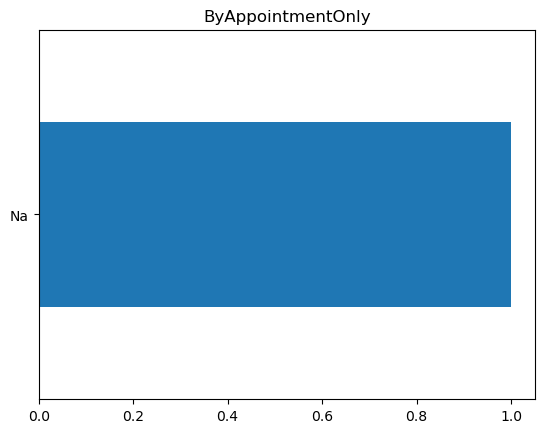

In [31]:
#Applying categoryEDA method on the column 
category_EDA('ByAppointmentOnly',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [32]:
#Dropping selected column
df_selected_restaurants.drop(columns="ByAppointmentOnly", inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3079254452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns="ByAppointmentOnly", inplace=True)


In [33]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 59 Columns left
The columns we have left are: 
 Index(['BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'RestaurantsAttire', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BusinessAcceptsCreditCards` column

Na       0.990505
False    0.008850
True     0.000645
Name: BusinessAcceptsCreditCards, dtype: float64


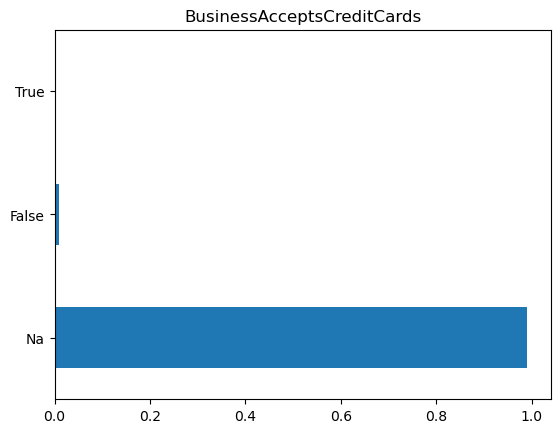

In [34]:
#Applying categoryEDA method on the column 
category_EDA('BusinessAcceptsCreditCards',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [35]:
#Dropping selected columns
df_selected_restaurants.drop(columns="BusinessAcceptsCreditCards", inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/19462658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns="BusinessAcceptsCreditCards", inplace=True)


In [36]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 58 Columns left
The columns we have left are: 
 Index(['BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet', 'RestaurantsPriceRange2', 'GoodForKids',
       'WheelchairAccessible', 'BikeParking', 'Alcohol', 'RestaurantsAttire',
       'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
       'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual',
       'RestaurantsGoodForGroups', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'Good

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BusinessParking` columns

Na       0.996589
True     0.003134
False    0.000277
Name: BusinessParking_garage, dtype: float64


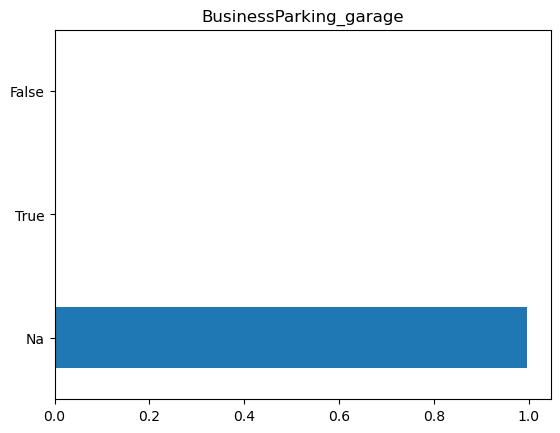

In [37]:
#Applying categoryEDA method on the column
category_EDA('BusinessParking_garage',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

False    0.486310
Na       0.483145
True     0.030544
Name: BusinessParking_street, dtype: float64


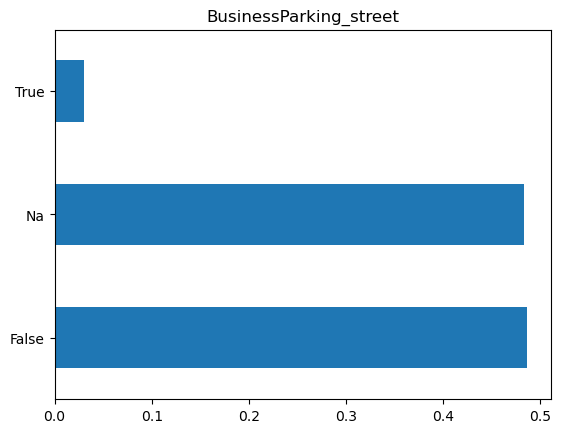

In [38]:
#Applying categoryEDA method on the column
category_EDA('BusinessParking_street',df_selected_restaurants)

While 50% of the values are there, the NA values aren't obviously put in either section. Street Parking can be readily available in the city and it isn't obvious which one to put it in so we'll drop this column

Na       0.483145
False    0.389423
True     0.127431
Name: BusinessParking_validated, dtype: float64


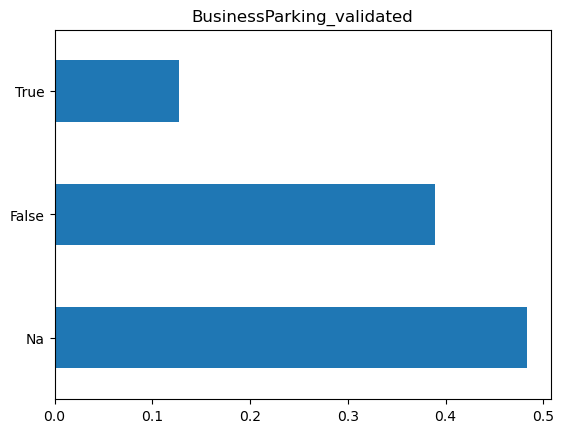

In [39]:
#Applying categoryEDA method on the column
category_EDA('BusinessParking_validated',df_selected_restaurants)

While over 50% of the data is non Na, the issue with this column is similar to the other column, it isn't obvious how to fill the NA values. With that, we'll drop these column.

False    0.513935
Na       0.483145
True     0.002919
Name: BusinessParking_lot, dtype: float64


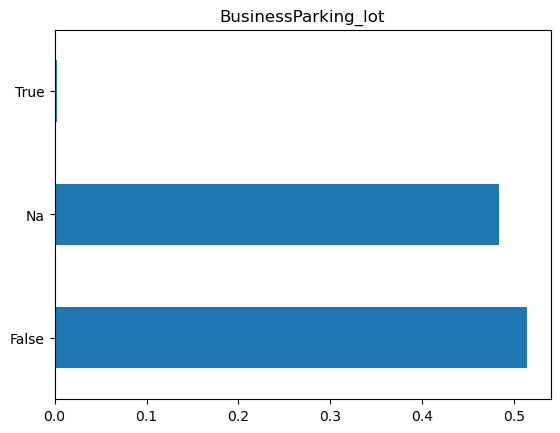

In [40]:
#Applying categoryEDA method on the column
category_EDA('BusinessParking_lot',df_selected_restaurants)

Having such a large imbalance in true and false wouldn't make for a good column as it wouldn't make sense to fill the NA with True, but filling it with False would make it a 99:1 ratio imbalance. As a result we'll drop this column

Na       0.483145
False    0.348185
True     0.168669
Name: BusinessParking_valet, dtype: float64


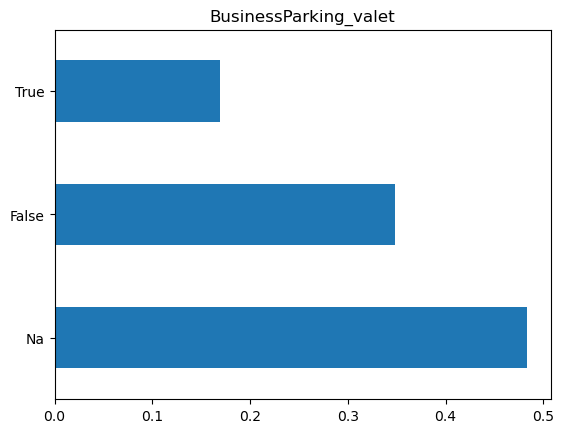

In [41]:
#Applying categoryEDA method on the column
category_EDA('BusinessParking_valet',df_selected_restaurants)

While there are a considerable amount of NA values with just under 50% being Na, it's reasonable to assume that if a restaurant isn't advertising this premium service, they likely don't have it. As well, we do have a decently sized true percentage which makes preserving this column valuable. As a result we'll add this to our dataset.

In [42]:
#Creating a new column in df_processed_attributes 
df_processed_attributes['BusinessParking_valet']=df_selected_restaurants['BusinessParking_valet']

In [43]:
#checking unique values in the column
df_processed_attributes['BusinessParking_valet'].unique()

array(['Na', 'False', 'True'], dtype=object)

Here we're just checking to make sure that the values are the same, now we'll set NA and false as 0 and 1 as True. 

In [44]:
#Using the where method to make this a binary numeric column 
df_processed_attributes['BusinessParking_valet']=np.where(df_processed_attributes['BusinessParking_valet']=='True',1,0)

In [45]:
#checking the value counts
df_processed_attributes['BusinessParking_valet'].value_counts(normalize=True)

0    0.831331
1    0.168669
Name: BusinessParking_valet, dtype: float64

After we've changed the values we checked the value counts and can see that the True values (assigned as 1) are still the same so we can conclude that we were successful. Now we can drop all the columns processed in this section.

In [46]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3915760108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['BusinessParking_garage', 'BusinessParking_street',


In [47]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 53 Columns left
The columns we have left are: 
 Index(['RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'RestaurantsAttire', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
    

The drop check shows that we've correctly dropped the columns so we can proceed. 

#### `RestaurantsPriceRange2` column 

Na    1.0
Name: RestaurantsPriceRange2, dtype: float64


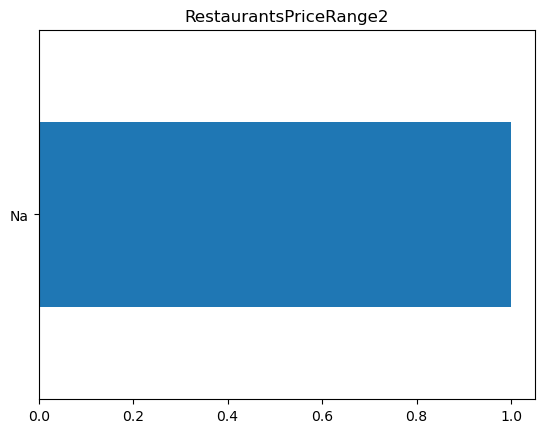

In [48]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsPriceRange2',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [49]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsPriceRange2',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/1922336039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsPriceRange2',inplace=True)


In [50]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 52 Columns left
The columns we have left are: 
 Index(['GoodForKids', 'WheelchairAccessible', 'BikeParking', 'Alcohol',
       'RestaurantsAttire', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_divey',
       'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale',
       'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'WiFi',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'RestaurantsTableService', 'OutdoorSeating', 'RestaurantsDelivery',
       'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRest

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `GoodForKids` column

Na    0.977414
2     0.011001
1     0.007805
3     0.003411
4     0.000369
Name: GoodForKids, dtype: float64


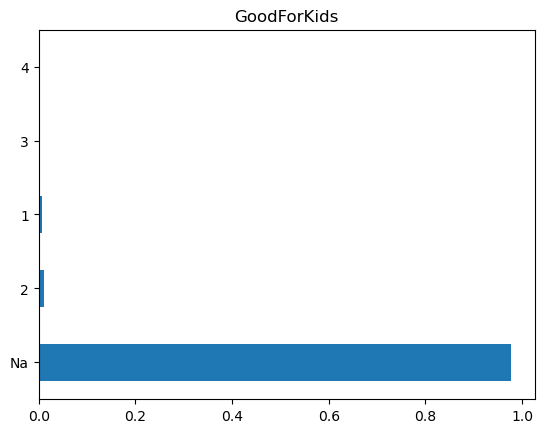

In [51]:
#Applying categoryEDA method on the column
category_EDA('GoodForKids',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [52]:
#Dropping selected columns
df_selected_restaurants.drop(columns='GoodForKids',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3850891176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='GoodForKids',inplace=True)


In [53]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 51 Columns left
The columns we have left are: 
 Index(['WheelchairAccessible', 'BikeParking', 'Alcohol', 'RestaurantsAttire',
       'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
       'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual',
       'RestaurantsGoodForGroups', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',


The drop check shows that we've correctly dropped the column so we can proceed. 

####  `WheelchairAccessible` column

Na       0.714747
True     0.246259
False    0.038995
Name: WheelchairAccessible, dtype: float64


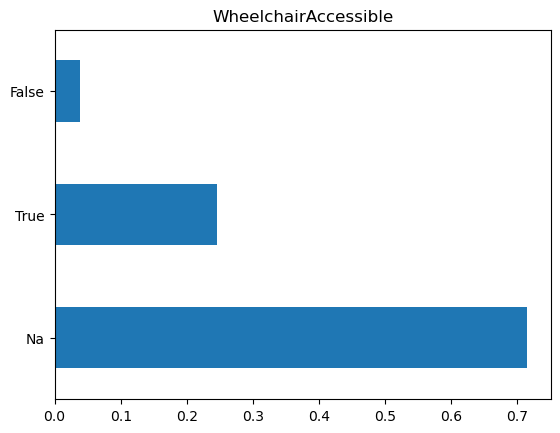

In [54]:
#Applying categoryEDA method on the column
category_EDA('WheelchairAccessible',df_selected_restaurants)

So we see that almost 25% of restaurants in our dataframe say they're wheelchair accessible while a very small percentage say they aren't with the vast majority not saying false or true. Its a reasonable assumption that accessibility is something that can make or break whether or not a customer will go to a restaurant. That means that it's reasonable to assume that if a restaurant does not advertise that they are wheelchair accessible, they would not be. Also from the perspective of the customer, this isn't like parking where you can just park slightly further. For people that are looking for restaurants with wheelchair accessibility, it is a vital trait that the restaurant needs to have for this group. Therefore, it wouldn't make sense to fill by True. Therefore we'll fill the NA values as false.

In [55]:
#Creating a new column in df_processed_attributes 
df_processed_attributes['WheelchairAccessible']=df_selected_restaurants['WheelchairAccessible']

In [56]:
#checking unique values in the new column created
df_processed_attributes['WheelchairAccessible'].unique()

array(['Na', 'True', 'False'], dtype=object)

After adding the column to the processed dataframe, we need to check to make sure we haven't added any unexpected values.

In [57]:
#using where method to change all NA values to false 
df_processed_attributes['WheelchairAccessible']=np.where(df_processed_attributes['WheelchairAccessible']=='True',1,0)

In [58]:
#checking the value count on the new processed dataframe
df_processed_attributes['WheelchairAccessible'].value_counts(normalize=True)

0    0.753741
1    0.246259
Name: WheelchairAccessible, dtype: float64

After we changed True values to 1 and NA/False values to 0, we're seeing the same percentage of True values(1) therefore, we can proceed.

In [59]:
#Dropping selected columns
df_selected_restaurants.drop(columns='WheelchairAccessible',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3192679942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='WheelchairAccessible',inplace=True)


In [60]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 50 Columns left
The columns we have left are: 
 Index(['BikeParking', 'Alcohol', 'RestaurantsAttire', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestricti

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BikeParking` Column

Na       0.718342
True     0.226070
False    0.055588
Name: BikeParking, dtype: float64


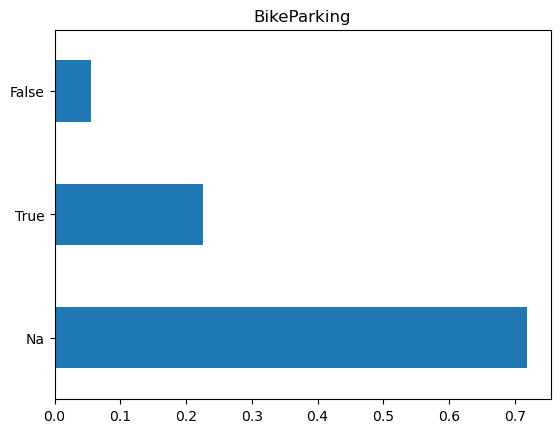

In [61]:
#Applying categoryEDA method on the column
category_EDA("BikeParking",df_selected_restaurants)

Bike parking while 22% have it as true, it wouldn't be the same as wheelchair accessibility for example, as many places have street bike parking and it wouldn't be reasonable to say that any business not advertising it on their yelp page, does not have it or have it at least nearby. Therefore it wouldn't be reasonable to fill by False so we'll have to drop the column. 

In [62]:
#Dropping selected columns
df_selected_restaurants.drop(columns="BikeParking",inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2733248788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns="BikeParking",inplace=True)


In [63]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 49 Columns left
The columns we have left are: 
 Index(['Alcohol', 'RestaurantsAttire', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `Alcohol` Column

Na       0.972375
True     0.020957
False    0.006668
Name: Alcohol, dtype: float64


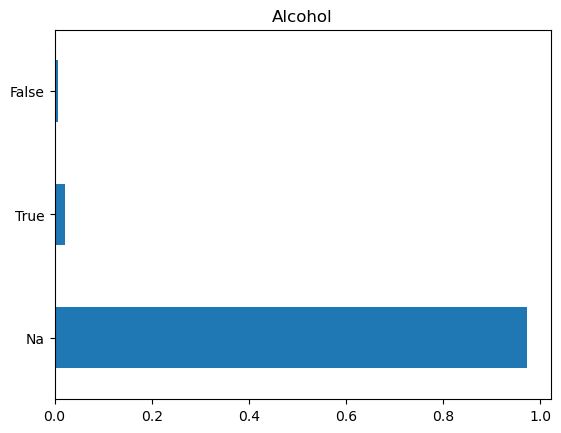

In [64]:
#Applying categoryEDA method on the column
category_EDA('Alcohol',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [65]:
#Dropping selected columns
df_selected_restaurants.drop(columns='Alcohol',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3226870744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='Alcohol',inplace=True)


In [66]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 48 Columns left
The columns we have left are: 
 Index(['RestaurantsAttire', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_divey',
       'Ambience_touristy', 'Ambience_trendy', 'Ambience_upscale',
       'Ambience_casual', 'RestaurantsGoodForGroups', 'Caters', 'WiFi',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'RestaurantsTableService', 'OutdoorSeating', 'RestaurantsDelivery',
       'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'Dietary

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsAttire` column

Na         0.998709
average    0.000768
quiet      0.000369
loud       0.000154
Name: RestaurantsAttire, dtype: float64


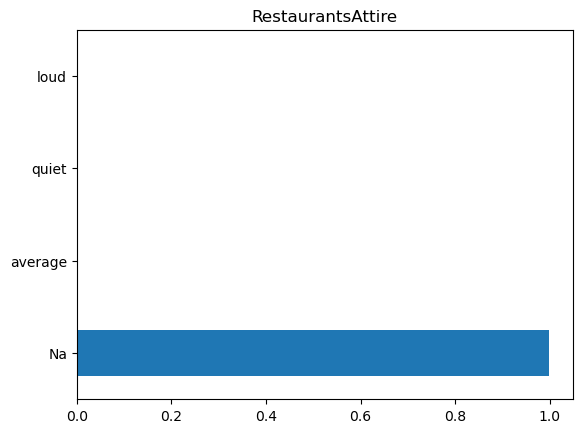

In [67]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsAttire',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [68]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsAttire',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/58763720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsAttire',inplace=True)


In [69]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 47 Columns left
The columns we have left are: 
 Index(['Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
       'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual',
       'RestaurantsGoodForGroups', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       

#### `Ambience` Columns

Na       0.999846
False    0.000154
Name: Ambience_romantic, dtype: float64


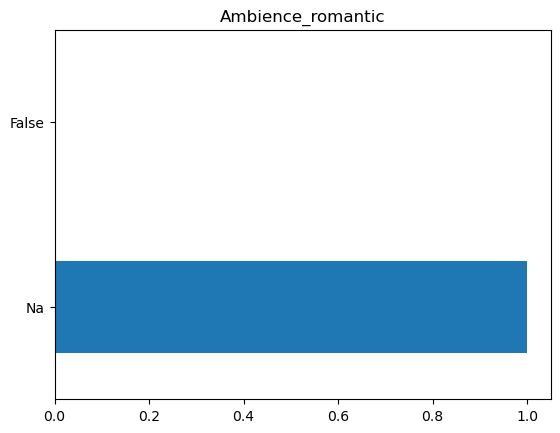

In [70]:
#Applying categoryEDA method on the column
category_EDA('Ambience_romantic',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_intimate, dtype: float64


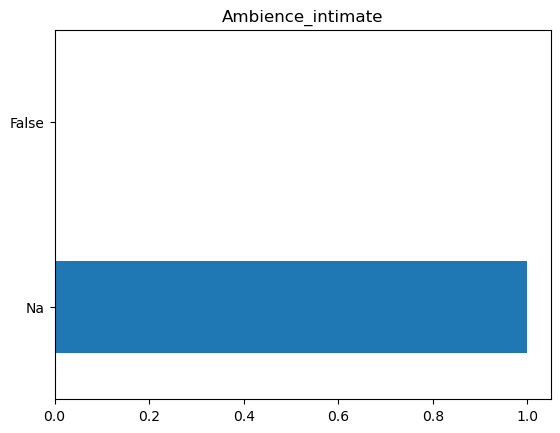

In [71]:
#Applying categoryEDA method on the column
category_EDA('Ambience_intimate',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_classy, dtype: float64


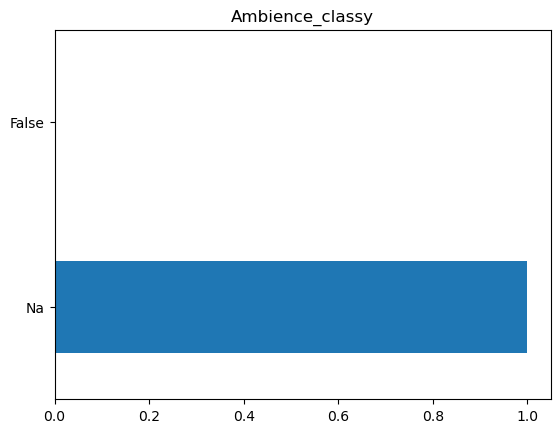

In [72]:
#Applying categoryEDA method on the column
category_EDA('Ambience_classy',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_hipster, dtype: float64


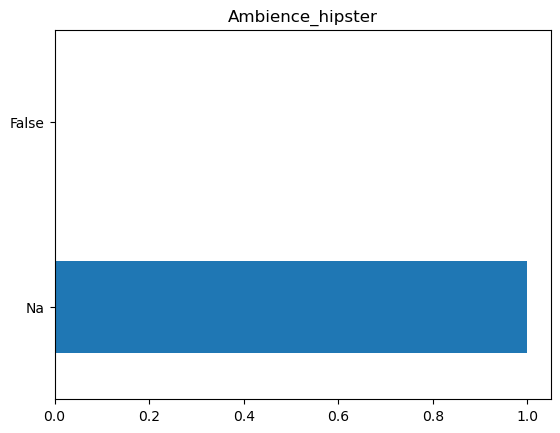

In [73]:
#Applying categoryEDA method on the column
category_EDA('Ambience_hipster',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_divey, dtype: float64


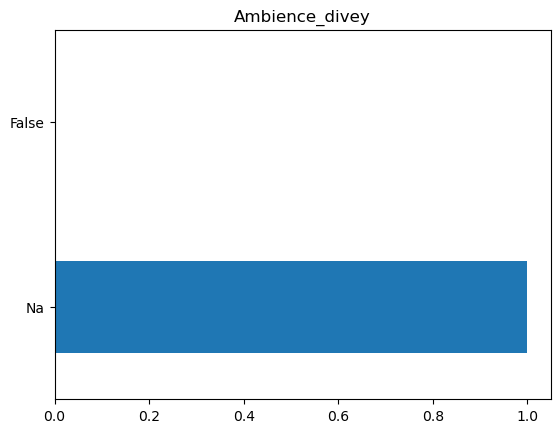

In [74]:
#Applying categoryEDA method on the column
category_EDA('Ambience_divey',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999939
False    0.000061
Name: Ambience_touristy, dtype: float64


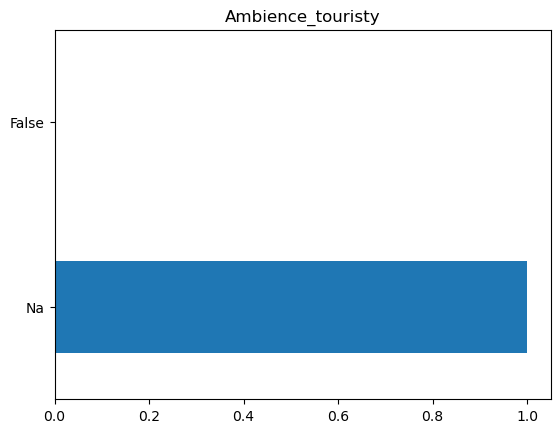

In [75]:
#Applying categoryEDA method on the column
category_EDA('Ambience_touristy',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_trendy, dtype: float64


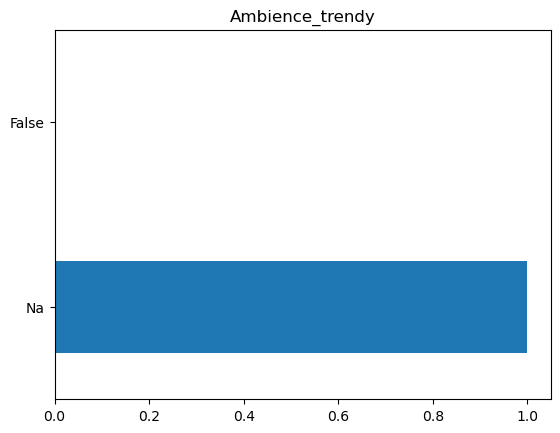

In [76]:
#Applying categoryEDA method on the column
category_EDA('Ambience_trendy',df_selected_restaurants)

Na       0.99917
False    0.00083
Name: Ambience_upscale, dtype: float64


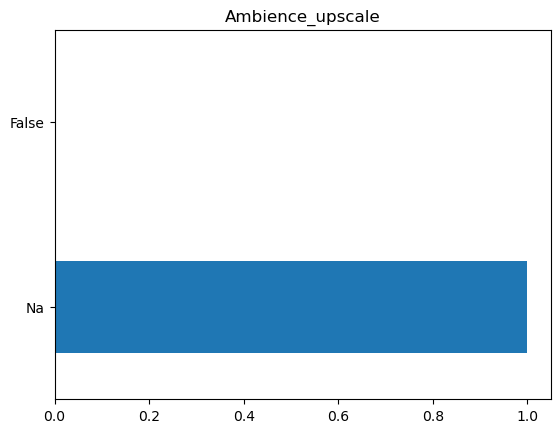

In [77]:
#Applying categoryEDA method on the column
category_EDA('Ambience_upscale',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.99917
False    0.00083
Name: Ambience_casual, dtype: float64


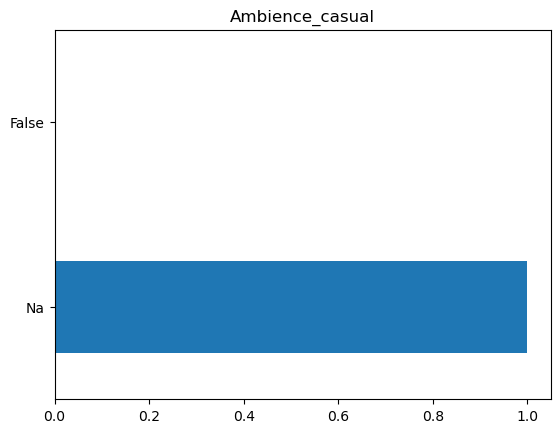

In [78]:
#Applying categoryEDA method on the column
category_EDA('Ambience_casual',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [79]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
       'Ambience_hipster', 'Ambience_divey', 'Ambience_touristy',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_casual'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2429992404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',


In [80]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 38 Columns left
The columns we have left are: 
 Index(['RestaurantsGoodForGroups', 'Caters', 'WiFi', 'RestaurantsReservations',
       'RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='ob

The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsGoodForGroups` column

Na       0.99917
False    0.00083
Name: RestaurantsGoodForGroups, dtype: float64


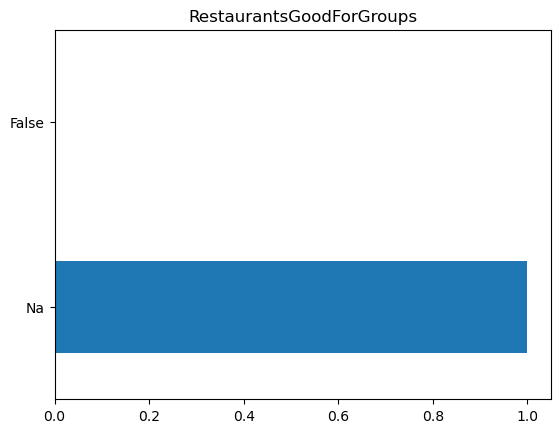

In [81]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsGoodForGroups',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [82]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsGoodForGroups',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2803196435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsGoodForGroups',inplace=True)


In [83]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 37 Columns left
The columns we have left are: 
 Index(['Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


#### `Caters` Column

Na       0.965092
True     0.025873
False    0.009034
Name: Caters, dtype: float64


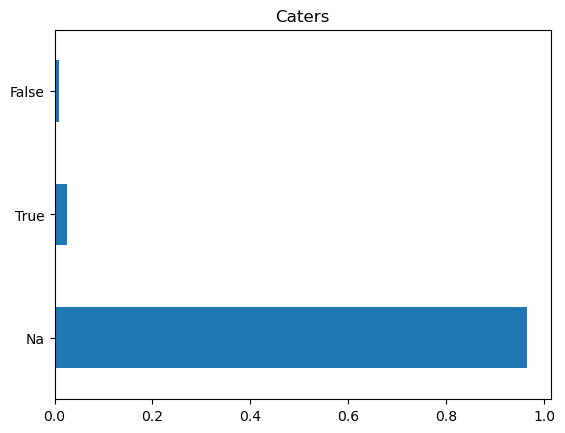

In [84]:
#Applying categoryEDA method on the column
category_EDA('Caters',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [85]:
#Dropping selected columns
df_selected_restaurants.drop(columns='Caters',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/639330854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='Caters',inplace=True)


In [86]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 36 Columns left
The columns we have left are: 
 Index(['WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'RestaurantsTableService', 'OutdoorSeating', 'RestaurantsDelivery',
       'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `Wifi` Column

Na       0.998310
True     0.001168
False    0.000522
Name: WiFi, dtype: float64


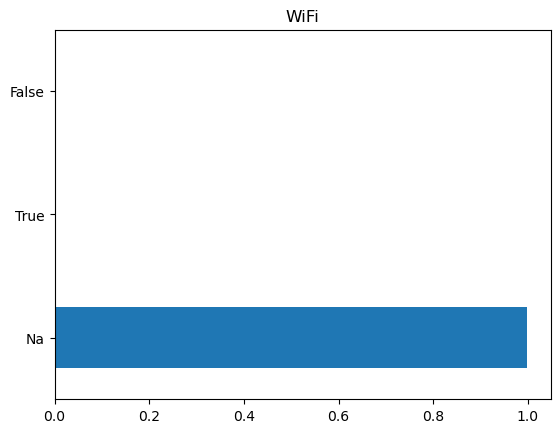

In [87]:
#Applying categoryEDA method on the column
category_EDA('WiFi',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [88]:
#Dropping selected columns
df_selected_restaurants.drop(columns='WiFi',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/304230014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='WiFi',inplace=True)


In [89]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 35 Columns left
The columns we have left are: 
 Index(['RestaurantsReservations', 'RestaurantsTakeOut', 'HappyHour',
       'RestaurantsTableService', 'OutdoorSeating', 'RestaurantsDelivery',
       'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsReservations` column

Na      0.997142
no      0.001383
free    0.001321
paid    0.000154
Name: RestaurantsReservations, dtype: float64


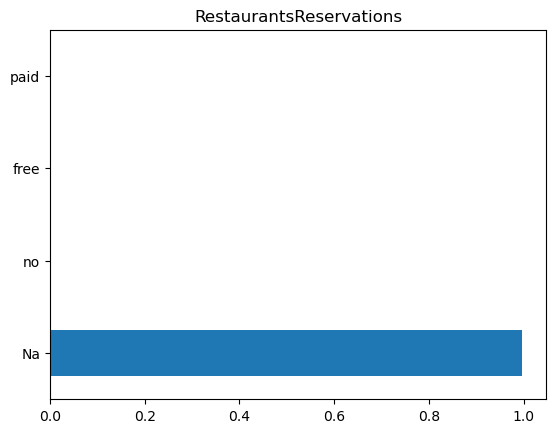

In [90]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsReservations',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [91]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsReservations',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2755552141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsReservations',inplace=True)


In [92]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 34 Columns left
The columns we have left are: 
 Index(['RestaurantsTakeOut', 'HappyHour', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsTakeOut` column

Na       0.994776
False    0.002981
True     0.002243
Name: RestaurantsTakeOut, dtype: float64


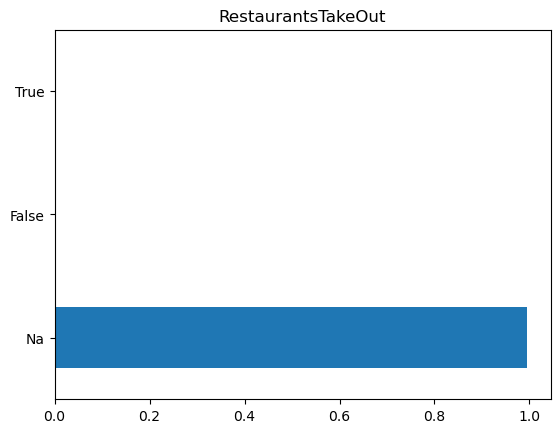

In [93]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsTakeOut',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [94]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsTakeOut',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3349371815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsTakeOut',inplace=True)


In [95]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 33 Columns left
The columns we have left are: 
 Index(['HappyHour', 'RestaurantsTableService', 'OutdoorSeating',
       'RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `HappyHour` column

Na       0.912024
True     0.075869
False    0.012107
Name: HappyHour, dtype: float64


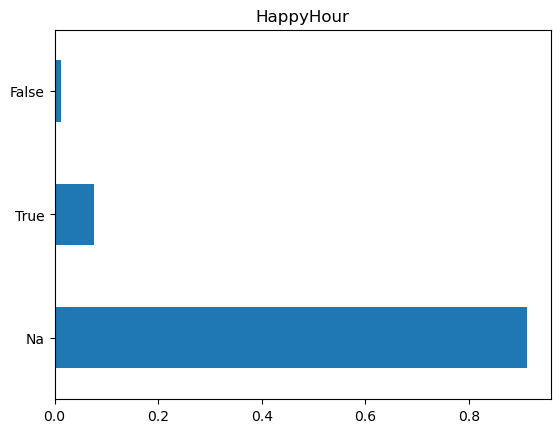

In [96]:
#Applying categoryEDA method on the column
category_EDA('HappyHour',df_selected_restaurants)

More than 90% of the values in this column are Na. From the perspective of a customer it isn't obvious if you should fill the NAs which strictly false or true. It's possible we could try to fill something like Bars differently than restaurants but happy hour isn't strictly a Bar special. With that being said theres still to much missing data to use this column.

In [97]:
#Dropping selected columns
df_selected_restaurants.drop(columns='HappyHour',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2638869074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='HappyHour',inplace=True)


In [98]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 32 Columns left
The columns we have left are: 
 Index(['RestaurantsTableService', 'OutdoorSeating', 'RestaurantsDelivery',
       'BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsTableService` column

Na       0.970685
False    0.020066
True     0.009249
Name: RestaurantsTableService, dtype: float64


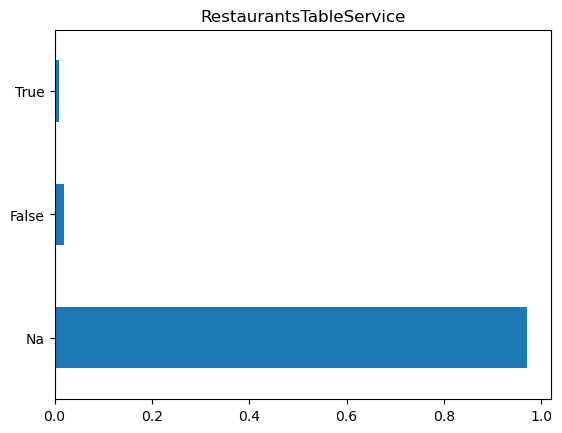

In [99]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsTableService',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [100]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsTableService',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2610707562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsTableService',inplace=True)


In [101]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 31 Columns left
The columns we have left are: 
 Index(['OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `OutdoorSeating` column

Na       0.970009
True     0.017638
False    0.012353
Name: OutdoorSeating, dtype: float64


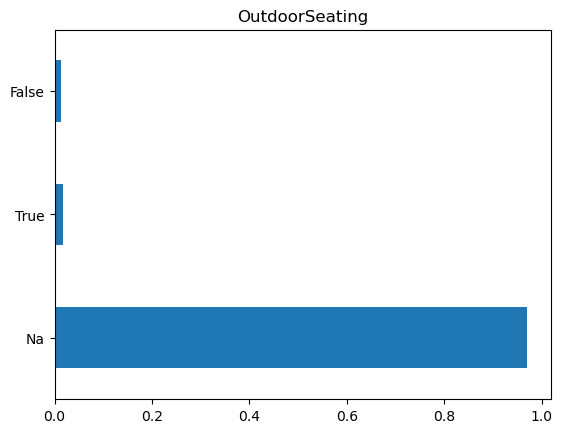

In [102]:
#Applying categoryEDA method on the column
category_EDA('OutdoorSeating',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [103]:
#Dropping selected columns
df_selected_restaurants.drop(columns='OutdoorSeating',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/2377589774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='OutdoorSeating',inplace=True)


In [104]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 30 Columns left
The columns we have left are: 
 Index(['RestaurantsDelivery', 'BestNights_monday', 'BestNights_tuesday',
       'BestNights_friday', 'BestNights_wednesday', 'BestNights_thursday',
       'BestNights_sunday', 'BestNights_saturday', 'GoodForMeal_dessert',
       'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
       'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsDelivery` column

Na       0.987862
False    0.008389
True     0.003749
Name: RestaurantsDelivery, dtype: float64


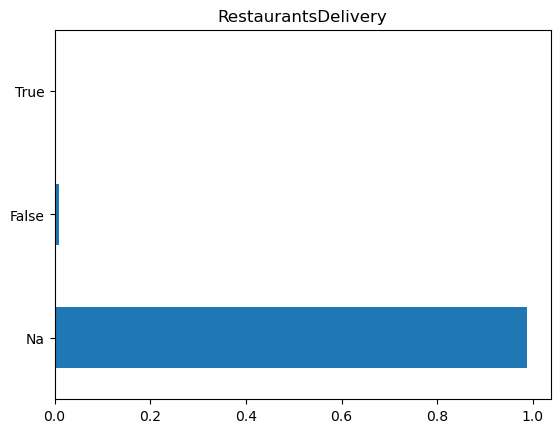

In [105]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsDelivery',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [106]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsDelivery',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3839646148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsDelivery',inplace=True)


In [107]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 29 Columns left
The columns we have left are: 
 Index(['BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_breakfast',
       'GoodForMeal_brunch', 'CoatCheck', 'DriveThru',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BestNights` Columns 

We'll interpret these columns as if they are dummy variable columns. This means that a low true value for one of the columns is not necessarily bad, but we'll need to access them together.

Na       0.967120
False    0.021449
True     0.011431
Name: BestNights_monday, dtype: float64


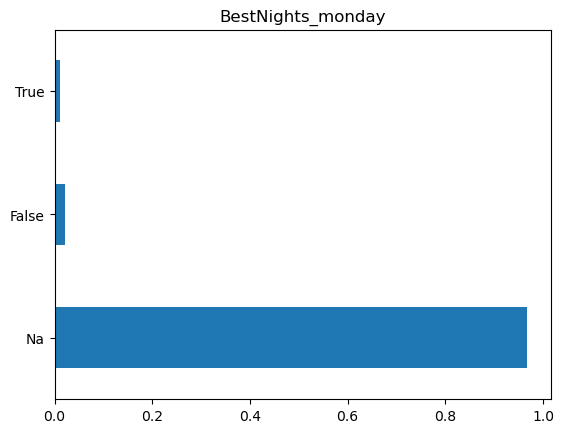

In [108]:
#Applying categoryEDA method on the column
category_EDA('BestNights_monday',df_selected_restaurants)

Na       0.999539
False    0.000461
Name: BestNights_tuesday, dtype: float64


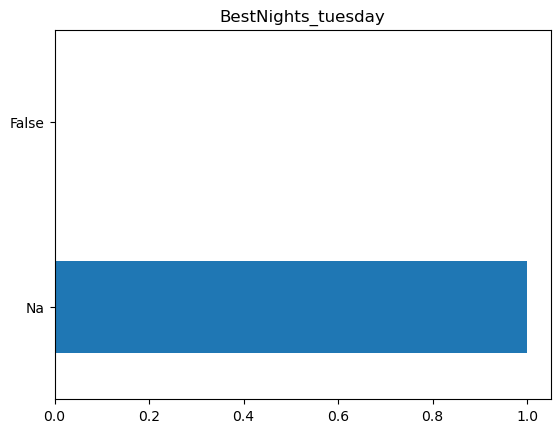

In [109]:
#Applying categoryEDA method on the column
category_EDA('BestNights_tuesday',df_selected_restaurants)

Na       0.999539
False    0.000399
True     0.000061
Name: BestNights_friday, dtype: float64


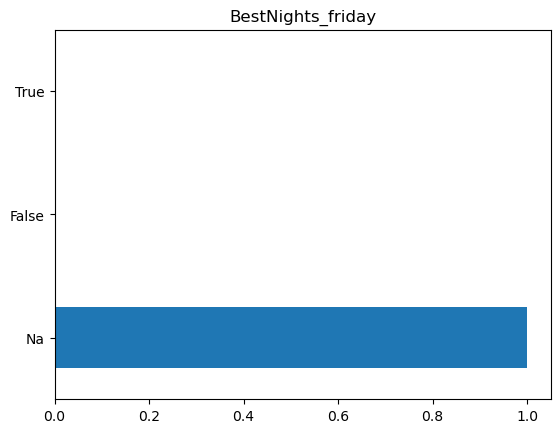

In [110]:
#Applying categoryEDA method on the column
category_EDA('BestNights_friday',df_selected_restaurants)

Na       0.999539
True     0.000338
False    0.000123
Name: BestNights_wednesday, dtype: float64


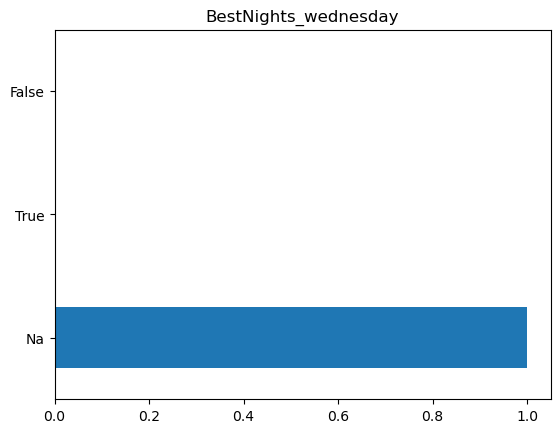

In [111]:
#Applying categoryEDA method on the column
category_EDA('BestNights_wednesday',df_selected_restaurants)

Na       0.999539
False    0.000369
True     0.000092
Name: BestNights_thursday, dtype: float64


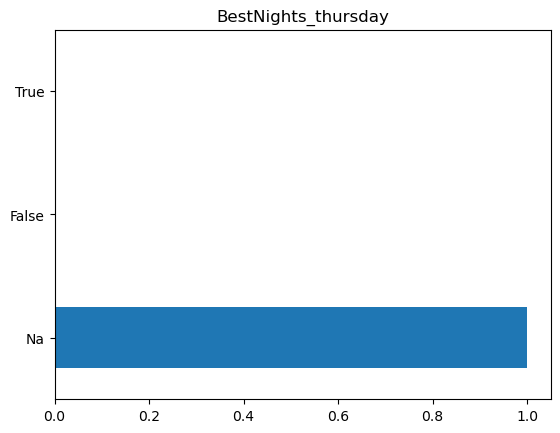

In [112]:
#Applying categoryEDA method on the column
category_EDA('BestNights_thursday',df_selected_restaurants)

Na       0.999539
False    0.000307
True     0.000154
Name: BestNights_sunday, dtype: float64


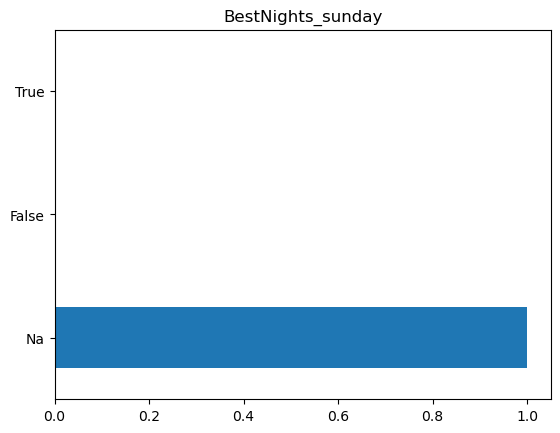

In [113]:
#Applying categoryEDA method on the column
category_EDA('BestNights_sunday',df_selected_restaurants)

Na       0.999539
False    0.000430
True     0.000031
Name: BestNights_saturday, dtype: float64


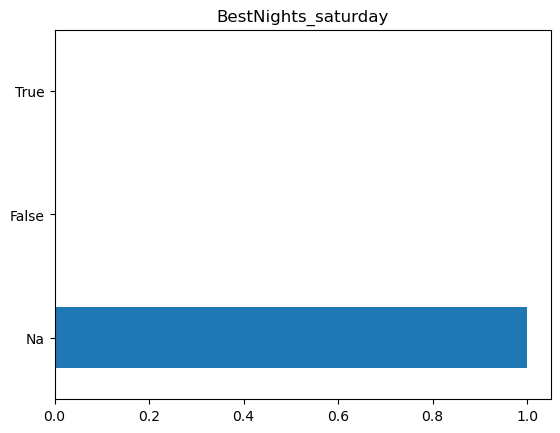

In [114]:
#Applying categoryEDA method on the column
category_EDA('BestNights_saturday',df_selected_restaurants)

One way to interpret these columns are that they were a dummy columns created. The issue is that even if we were to add all the true values from all the days and assign everything else as false, we'd still be well above 90% of NA values. This means that we'll have to drop all these columns. 

In [115]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',
       'BestNights_wednesday', 'BestNights_thursday', 'BestNights_sunday',
       'BestNights_saturday'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/4200740656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['BestNights_monday', 'BestNights_tuesday', 'BestNights_friday',


In [116]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 22 Columns left
The columns we have left are: 
 Index(['GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `GoodForMeal` columns

While previously we decided that for the BestNights we'd interpret it as dummy variables, this one is less obvious whether or not the values are mutually exclusive since something can be good as both a dessert and lunch. So we'll interpret them individually, and interpret as a group in the end.

Na       0.999539
True     0.000307
False    0.000154
Name: GoodForMeal_dessert, dtype: float64


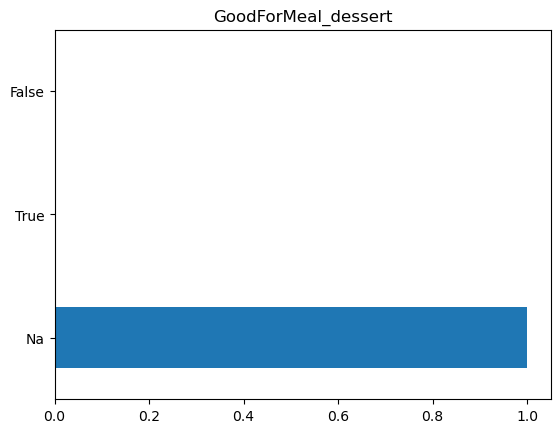

In [117]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_dessert',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.983130
False    0.014811
True     0.002059
Name: GoodForMeal_latenight, dtype: float64


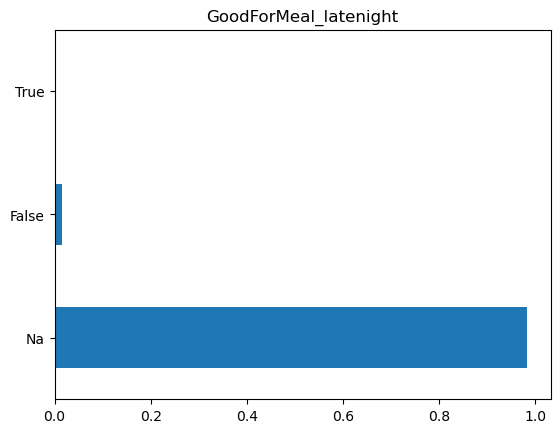

In [118]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_latenight',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.983130
False    0.015364
True     0.001506
Name: GoodForMeal_lunch, dtype: float64


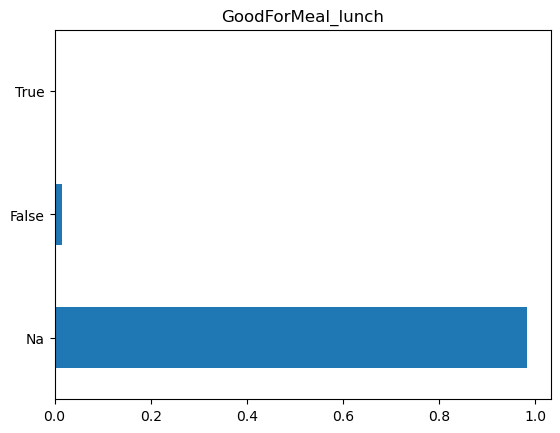

In [119]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_lunch',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.983130
True     0.010079
False    0.006791
Name: GoodForMeal_dinner, dtype: float64


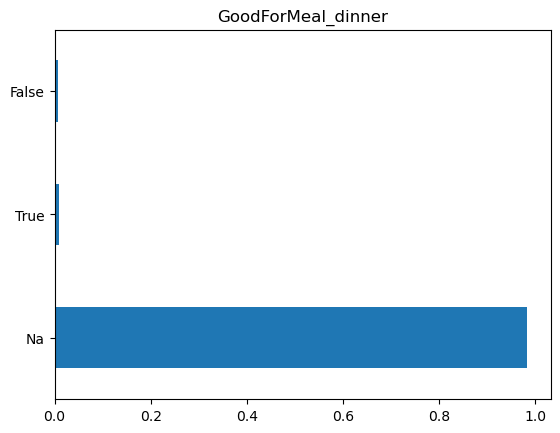

In [120]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_dinner',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.983130
True     0.009925
False    0.006945
Name: GoodForMeal_breakfast, dtype: float64


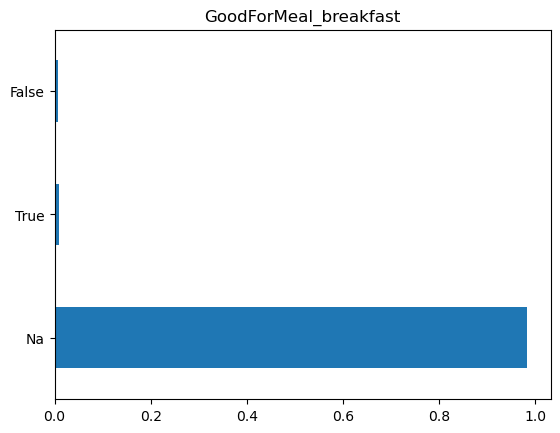

In [121]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_breakfast',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.983130
False    0.014504
True     0.002366
Name: GoodForMeal_brunch, dtype: float64


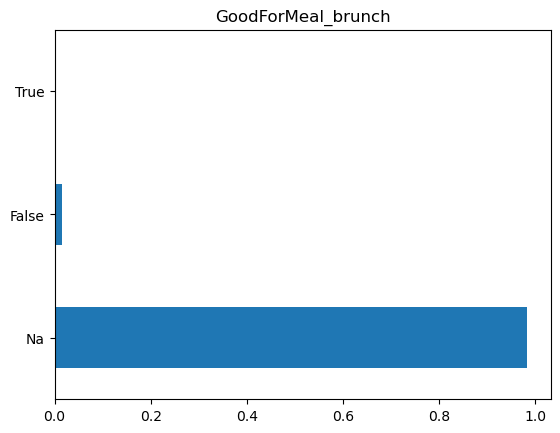

In [122]:
#Applying categoryEDA method on the column
category_EDA('GoodForMeal_brunch',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

The issue is that if we were to add all the true values from all the days and assign everything else as false, we'd still be well above 90% of NA values. This means that we'll have to drop all these columns. 

In [123]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3931660631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',


In [124]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 16 Columns left
The columns we have left are: 
 Index(['CoatCheck', 'DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours',
       'BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `CoatCheck` column

Na       0.983130
False    0.014227
True     0.002643
Name: CoatCheck, dtype: float64


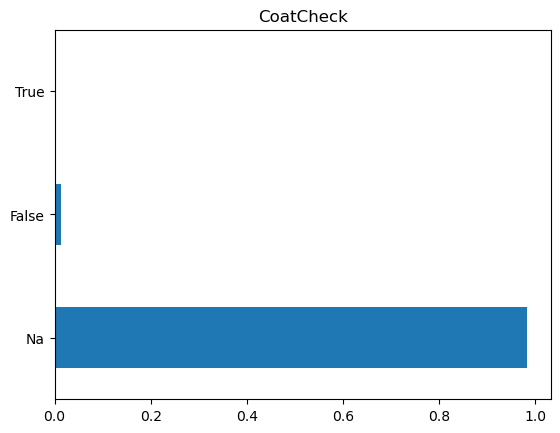

In [125]:
#Applying categoryEDA method on the column
category_EDA('CoatCheck',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [126]:
#Dropping selected columns
df_selected_restaurants.drop(columns='CoatCheck',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/46810107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='CoatCheck',inplace=True)


In [127]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 15 Columns left
The columns we have left are: 
 Index(['DriveThru', 'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage',
       'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `DriveThru` column

Na         0.987862
no         0.006207
outdoor    0.003288
yes        0.002643
Name: DriveThru, dtype: float64


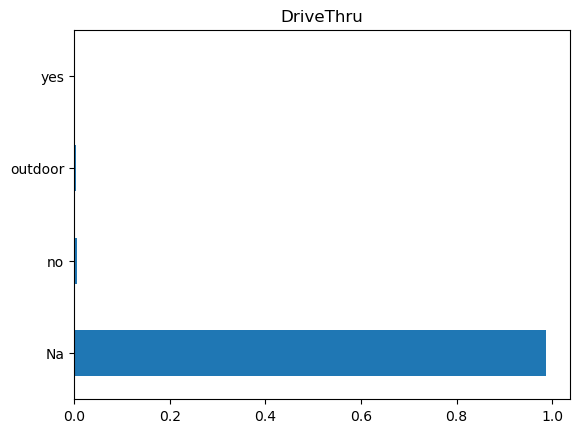

In [128]:
#Applying categoryEDA method on the column
category_EDA('DriveThru',df_selected_restaurants)

In [129]:
#Dropping selected columns
df_selected_restaurants.drop(columns='DriveThru',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/1953328663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='DriveThru',inplace=True)


In [130]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 14 Columns left
The columns we have left are: 
 Index(['BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BusinessAcceptsBitcoin`

Na       0.999723
False    0.000246
True     0.000031
Name: BusinessAcceptsBitcoin, dtype: float64


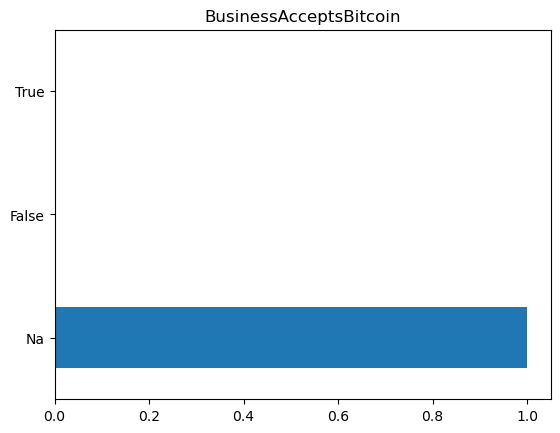

In [131]:
#Applying categoryEDA method on the column
category_EDA('BusinessAcceptsBitcoin',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [132]:
#Dropping selected columns
df_selected_restaurants.drop(columns='BusinessAcceptsBitcoin',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/84342547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='BusinessAcceptsBitcoin',inplace=True)


In [133]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 13 Columns left
The columns we have left are: 
 Index(['Open24Hours', 'BYOBCorkage', 'BYOB', 'Corkage',
       'DietaryRestrictions_dairy-free', 'DietaryRestrictions_gluten-free',
       'DietaryRestrictions_vegan', 'DietaryRestrictions_kosher',
       'DietaryRestrictions_halal', 'DietaryRestrictions_soy-free',
       'DietaryRestrictions_vegetarian', 'AgesAllowed',
       'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `Open24Hours` Column 

Na       0.999723
False    0.000277
Name: Open24Hours, dtype: float64


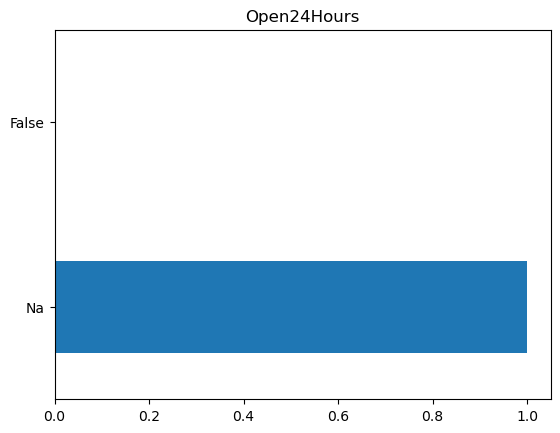

In [134]:
#Applying categoryEDA method on the column
category_EDA('Open24Hours',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [135]:
#Dropping selected columns
df_selected_restaurants.drop(columns='Open24Hours',inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/4171282287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='Open24Hours',inplace=True)


In [136]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 12 Columns left
The columns we have left are: 
 Index(['BYOBCorkage', 'BYOB', 'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `BYOB` Columns

Na    1.0
Name: BYOBCorkage, dtype: float64


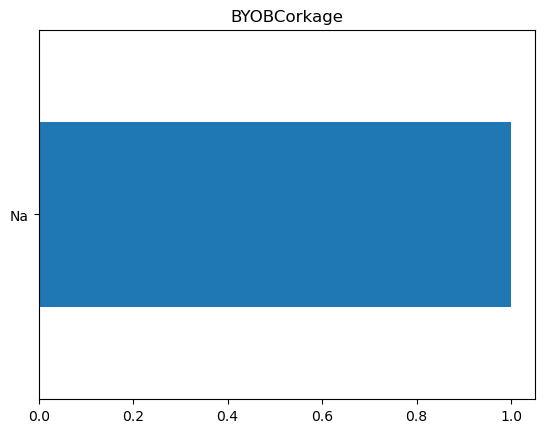

In [137]:
#Applying categoryEDA method on the column
category_EDA('BYOBCorkage',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na             0.999693
yes_free       0.000184
yes_corkage    0.000092
no             0.000031
Name: BYOB, dtype: float64


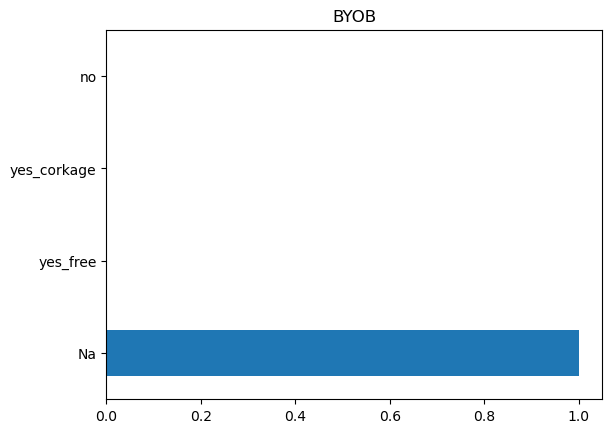

In [138]:
#Applying categoryEDA method on the column
category_EDA('BYOB',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na    1.0
Name: Corkage, dtype: float64


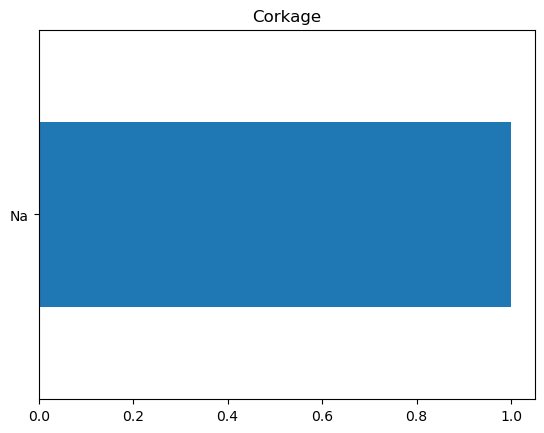

In [139]:
#Applying categoryEDA method on the column
category_EDA('Corkage',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [140]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['BYOBCorkage', 'BYOB', 'Corkage'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/421403977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['BYOBCorkage', 'BYOB', 'Corkage'], inplace=True)


In [141]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 9 Columns left
The columns we have left are: 
 Index(['DietaryRestrictions_dairy-free', 'DietaryRestrictions_gluten-free',
       'DietaryRestrictions_vegan', 'DietaryRestrictions_kosher',
       'DietaryRestrictions_halal', 'DietaryRestrictions_soy-free',
       'DietaryRestrictions_vegetarian', 'AgesAllowed',
       'RestaurantsCounterService'],
      dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `DietaryRestrictions` Columns

Na    1.0
Name: DietaryRestrictions_dairy-free, dtype: float64


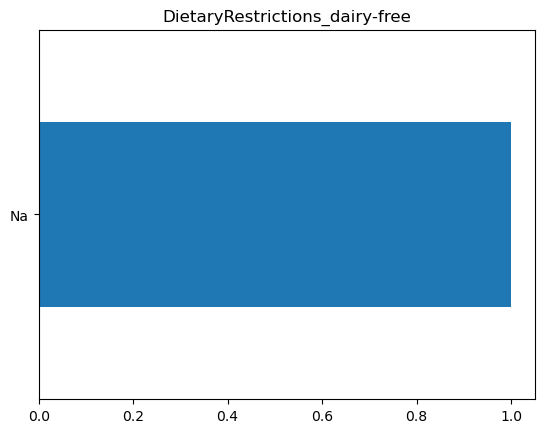

In [142]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_dairy-free',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
False    0.000307
True     0.000092
Name: DietaryRestrictions_gluten-free, dtype: float64


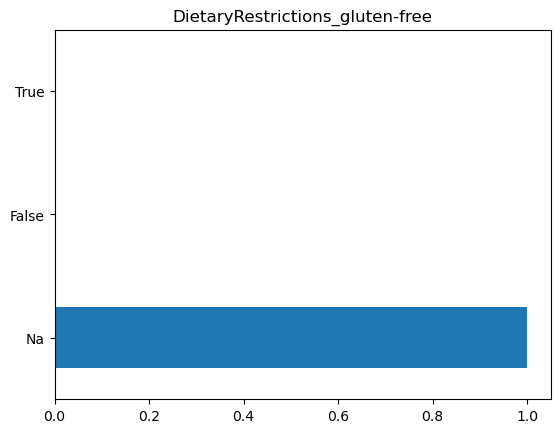

In [143]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_gluten-free',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
False    0.000307
True     0.000092
Name: DietaryRestrictions_vegan, dtype: float64


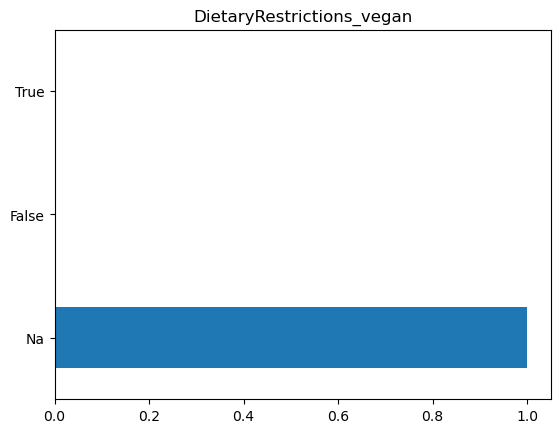

In [144]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_vegan',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
True     0.000246
False    0.000154
Name: DietaryRestrictions_kosher, dtype: float64


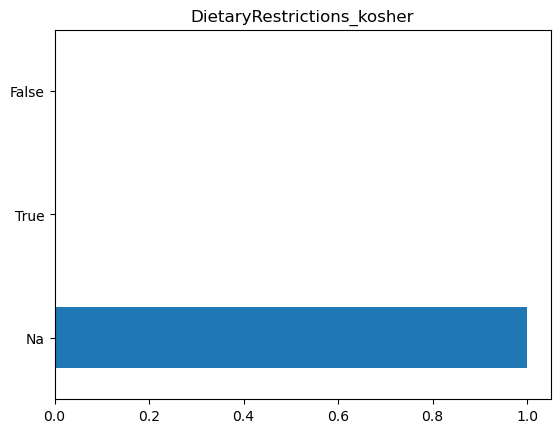

In [145]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_kosher',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
False    0.000399
Name: DietaryRestrictions_halal, dtype: float64


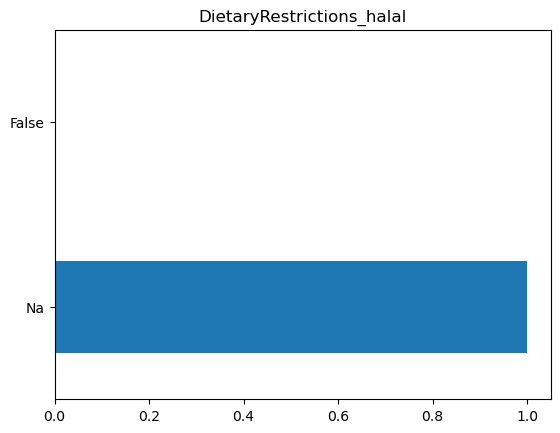

In [146]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_halal',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
False    0.000369
True     0.000031
Name: DietaryRestrictions_soy-free, dtype: float64


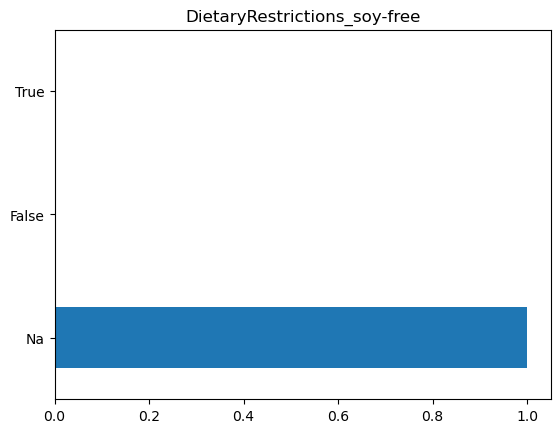

In [147]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_soy-free',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

Na       0.999601
False    0.000369
True     0.000031
Name: DietaryRestrictions_vegetarian, dtype: float64


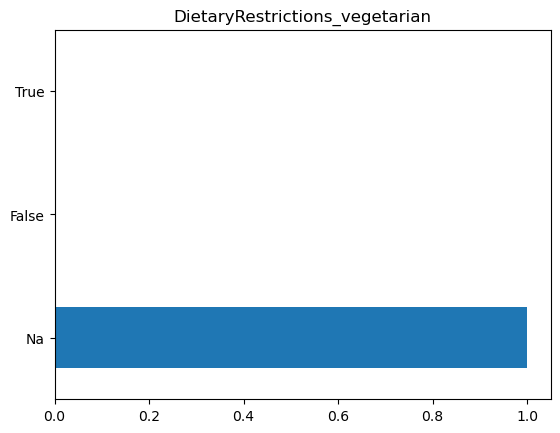

In [148]:
#Applying categoryEDA method on the column
category_EDA('DietaryRestrictions_vegetarian',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [149]:
#Dropping selected columns
df_selected_restaurants.drop(columns=['DietaryRestrictions_dairy-free', 'DietaryRestrictions_gluten-free',
       'DietaryRestrictions_vegan', 'DietaryRestrictions_kosher',
       'DietaryRestrictions_halal', 'DietaryRestrictions_soy-free',
       'DietaryRestrictions_vegetarian'], inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/297351721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns=['DietaryRestrictions_dairy-free', 'DietaryRestrictions_gluten-free',


In [150]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 2 Columns left
The columns we have left are: 
 Index(['AgesAllowed', 'RestaurantsCounterService'], dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `AgesAllowed` column

Na       0.999601
True     0.000246
False    0.000154
Name: AgesAllowed, dtype: float64


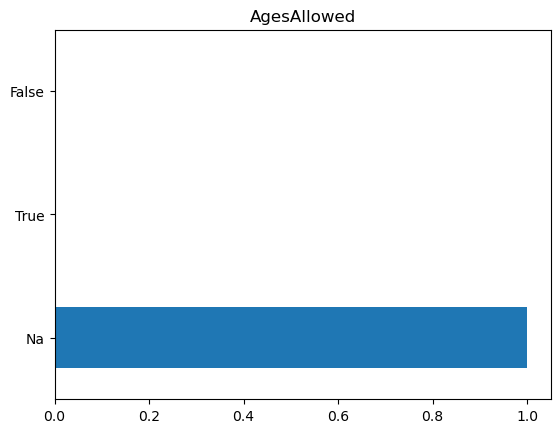

In [151]:
#Applying categoryEDA method on the column
category_EDA('AgesAllowed',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [152]:
#Dropping selected columns
df_selected_restaurants.drop(columns='AgesAllowed', inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3066990940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='AgesAllowed', inplace=True)


In [153]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 1 Columns left
The columns we have left are: 
 Index(['RestaurantsCounterService'], dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

#### `RestaurantsCounterService` column

Na         0.999939
allages    0.000031
18plus     0.000031
Name: RestaurantsCounterService, dtype: float64


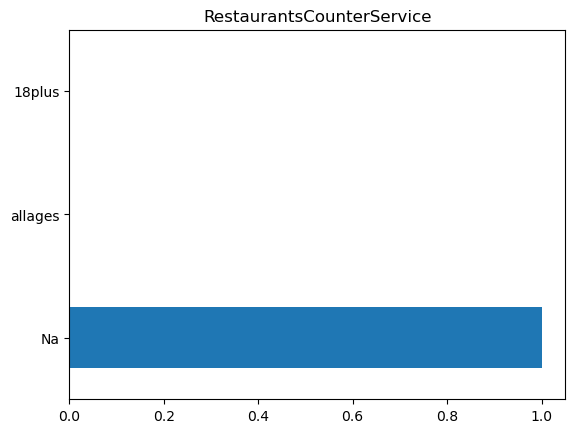

In [154]:
#Applying categoryEDA method on the column
category_EDA('RestaurantsCounterService',df_selected_restaurants)

More than 95% of the values in this column are Na so we'll drop this column. 

In [155]:
#Dropping selected columns
df_selected_restaurants.drop(columns='RestaurantsCounterService', inplace=True)

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_10978/3564179831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_restaurants.drop(columns='RestaurantsCounterService', inplace=True)


In [156]:
#Checking if it was dropped correctly
drop_check(df_selected_restaurants)

We have 0 Columns left
The columns we have left are: 
 Index([], dtype='object')


The drop check shows that we've correctly dropped the column so we can proceed. 

In [157]:
#Now we'll merge the processed attributes with the df_state_business and overwrite it. 
df_state_business=pd.merge(df_state_business,df_processed_attributes,on='business_id')

After processing the attributes, we've added two different columns to our main Dataframe. We'll now proceed with `df_state_business`